# Forecasting Earnings On College Majors

## Introduction

In this project, We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors)

It is always good to understand the data dictionary labels in the dataset.Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

* Rank - Rank by median earnings (the dataset is ordered by this column).

* Major_code - Major code.

* Major - Major description.

* Major_category - Category of major.

* Total - Total number of people with major.

* Sample_size - Sample size (unweighted) of full-time.

* Men - Male graduates.

* Women - Female graduates.

* ShareWomen - Women as share of total.

* Employed - Number employed.

* Median - Median salary of full-time, year-round workers.

* Low_wage_jobs - Number in low-wage service jobs.

* Full_time - Number employed 35 hours or more.

* Part_time - Number employed less than 35 hours

If we observe the data is sorted by the first column, rank, which reflects the median earning for each major. So, we can say that the dataset is ordered by the median salary.

The main goal of this project is to, using only data visualization, answer some questions, such as, if students in more popular majors make more money, or students that majored in subjects that were majority female make more money.

In [1]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#reading the dataset
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

Petroleum Engineering is major with the highest median earnings. 
Let's continue to see the first and last five rows .

In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


We can see that all first five majors with highest earnings belong to the category-Engineering.

In [4]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In last five majors, we can see that with highest earnings belong to the category- Psyschology & Social work.  Let's continue to see the summary statistics.

In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


From the above summary, we can identify some interesting points:

* Average median salary for all the majors is $40,000
* Average Unemployment rate is close to 7%
* Average share women is around 52%

Now, let's continue to find if we have any null values in our rows.

## Missing Values Handling

In [6]:
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
print(raw_data_count)
print(cleaned_data_count)

173
172


We have observed that one row was deleted.

## Data Visualizations

We will begin working with scatter plots. This plot will help us to visualize any correlation between two varaibles. Just incase, if our scatter plot is too dense in some areas,we'll be using Hexbin plots. This can be viewed as an alternative to scatter plots.

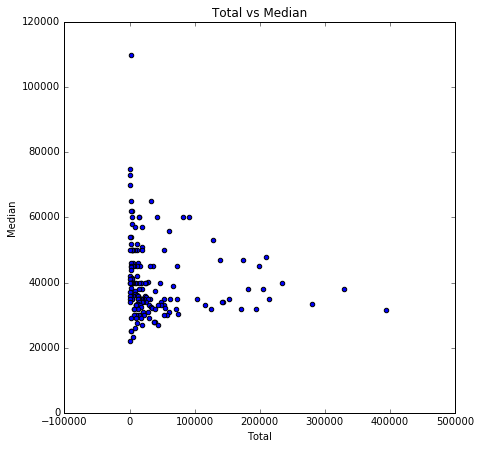

In [7]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x = recent_grads['Total'],y=recent_grads['Median'])
ax.set_title('Total vs Median')
ax.set_xlabel('Total')
ax.set_ylabel('Median')
plt.show()

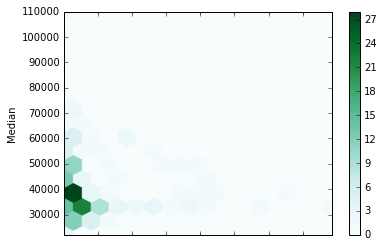

In [8]:
recent_grads.plot.hexbin(x = 'Total', y='Median', gridsize=15);

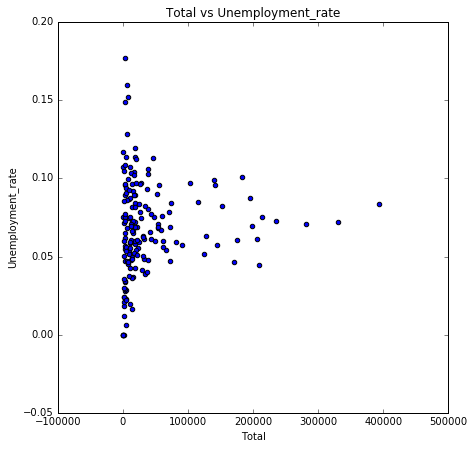

In [9]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x = recent_grads['Total'],y=recent_grads['Unemployment_rate'])
ax.set_title('Total vs Unemployment_rate')
ax.set_xlabel('Total')
ax.set_ylabel('Unemployment_rate')
plt.show()

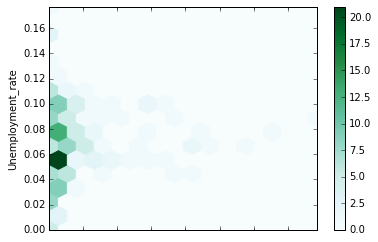

In [10]:
recent_grads.plot.hexbin(x = 'Total', y='Unemployment_rate', gridsize=15);

We can see that there's no correlation between the total of students in the major neither with the median salary nor with the unemployment rate.

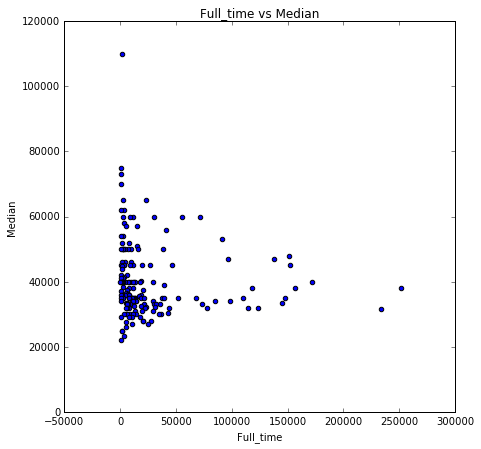

In [11]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x = recent_grads['Full_time'],y=recent_grads['Median'])
ax.set_title('Full_time vs Median')
ax.set_xlabel('Full_time')
ax.set_ylabel('Median')
plt.show()

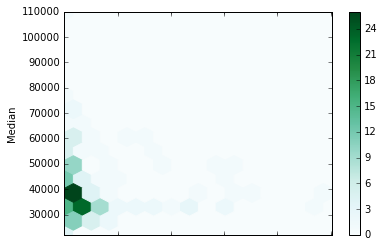

In [12]:
recent_grads.plot.hexbin(x = 'Full_time', y='Median', gridsize=15);

We also can't see no correlation between the amount of graduated with full time job and the median salary or unemployment rate.

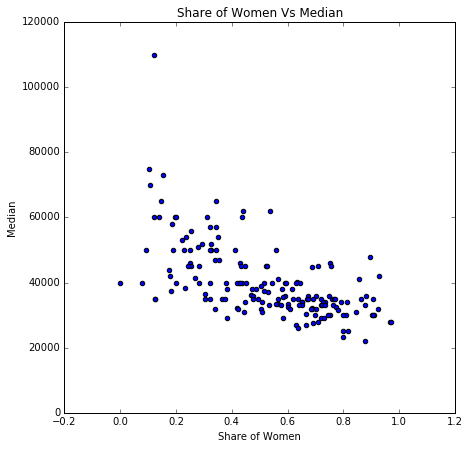

In [13]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x=recent_grads['ShareWomen'], y=recent_grads['Median'])
ax.set_title('Share of Women Vs Median')
ax.set_xlabel('Share of Women')
ax.set_ylabel('Median')

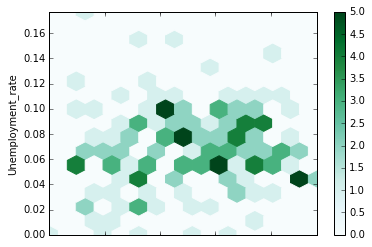

In [14]:
recent_grads.plot.hexbin(x = 'ShareWomen', y='Unemployment_rate', gridsize=15);

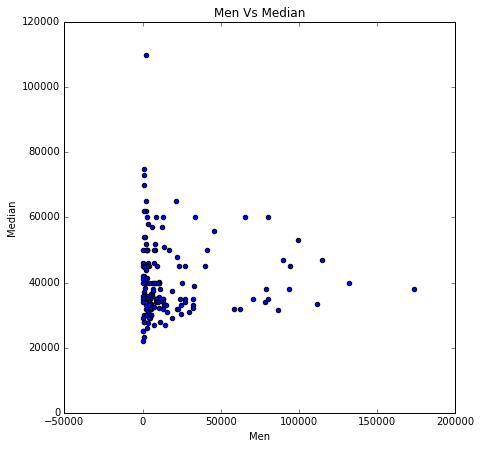

In [15]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x=recent_grads['Men'], y=recent_grads['Median'])
ax.set_title('Men Vs Median')
ax.set_xlabel('Men')
ax.set_ylabel('Median')
plt.show()

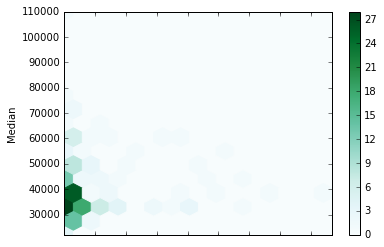

In [16]:
recent_grads.plot.hexbin(x = 'Men', y='Median', gridsize=15);

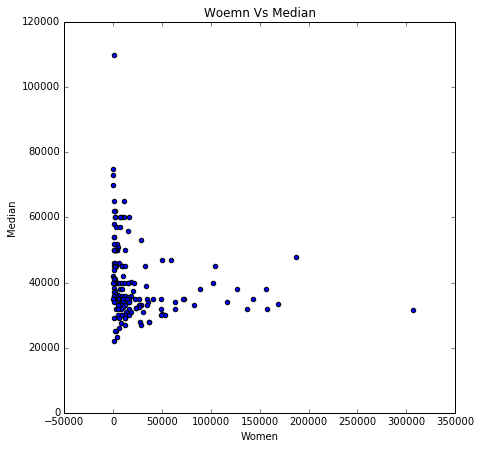

In [17]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x=recent_grads['Women'], y=recent_grads['Median'])
ax.set_title('Woemn Vs Median')
ax.set_xlabel('Women')
ax.set_ylabel('Median')
plt.show()

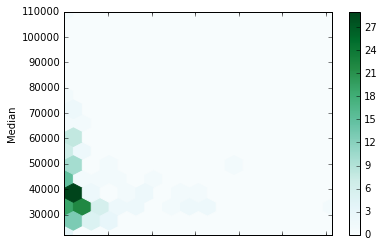

In [18]:
recent_grads.plot.hexbin(x = 'Women', y='Median', gridsize=15);

All the plots look pretty much same, showing no correlation, with the except of the 'Share of Women Vs Median' plot that shows a small negative correlation between the share of women and the median salary.

As we are on the gender subject, let's visualize the proportion of men and women in each one of the categories of majors.

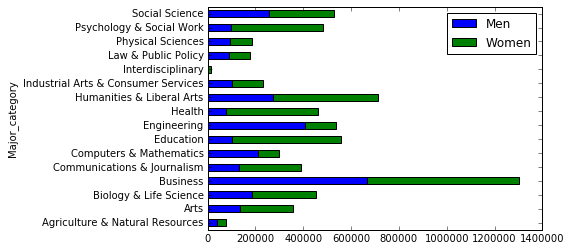

In [19]:
recent_grads.groupby('Major_category')['Men', 'Women'].sum().plot(kind='barh', stacked=True)

Now let's see how many categories have the average share of women per major greater than 0.5.

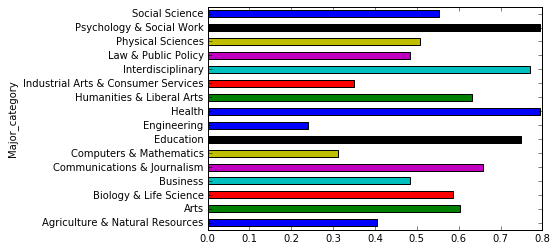

In [20]:
recent_grads.groupby('Major_category').ShareWomen.mean().plot.barh()

10 of the 16 categories have, in average, more women graduate than men graduate. 

we'll continue by plotting some histograms to see the distribution of some of the columns. As the histograms represent data in a pretty straight forward way, there's no need to explain this chart by chart.

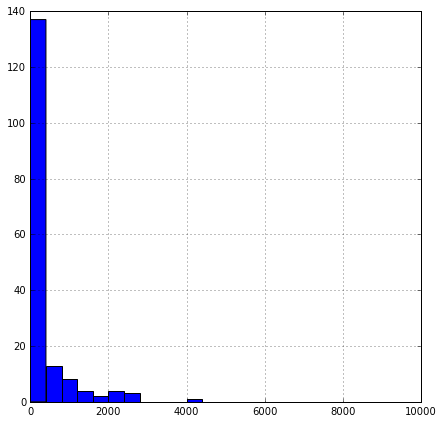

In [23]:
recent_grads['Sample_size'].hist(bins=25, range=(0,10000), figsize = (7,7))

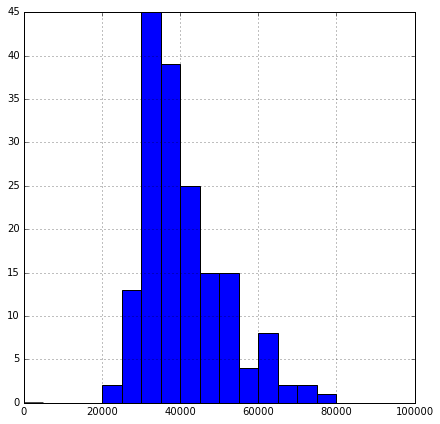

In [24]:
recent_grads['Median'].hist(bins = 20, range=(0,100000),figsize = (7,7))

The most common median salary ranges from 30 to 40 thousand dollars

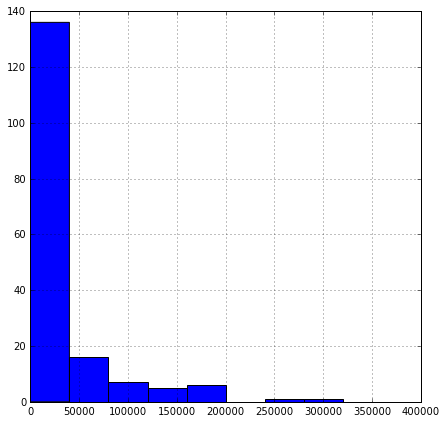

In [37]:
recent_grads['Employed'].hist(bins = 10, range=(0,400000),figsize = (7,7))

The most common number of employed graduates range in between 0 and 25 thousand

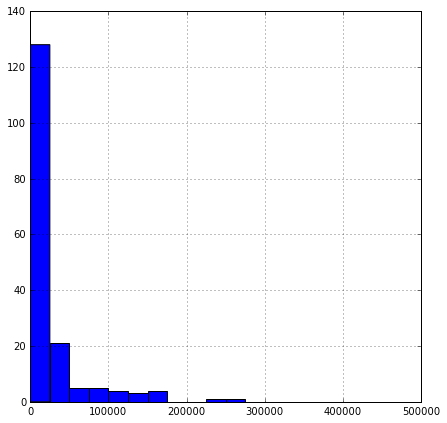

In [26]:
recent_grads['Full_time'].hist(bins = 20, range=(0,500000),figsize = (7,7))

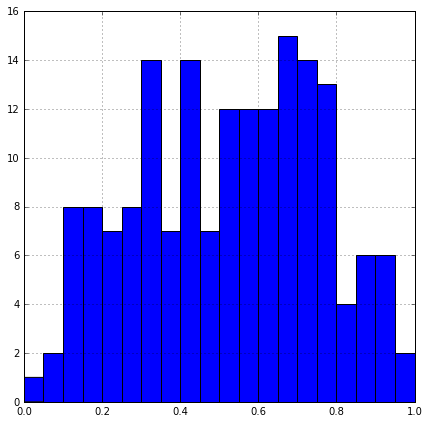

In [31]:
recent_grads['ShareWomen'].hist(bins = 20, range=(0,1),figsize = (7,7))

The most common share of women in the majors in this dataset range in between 0.6 and 0.8.

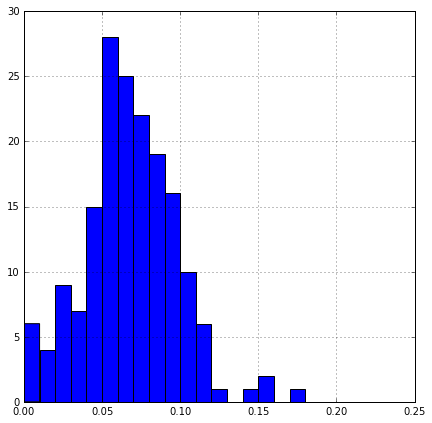

In [29]:
recent_grads['Unemployment_rate'].hist(bins = 20, range=(0,0.2),figsize = (7,7))

And the most commons unemployment rates range from 5% to 6,25%.

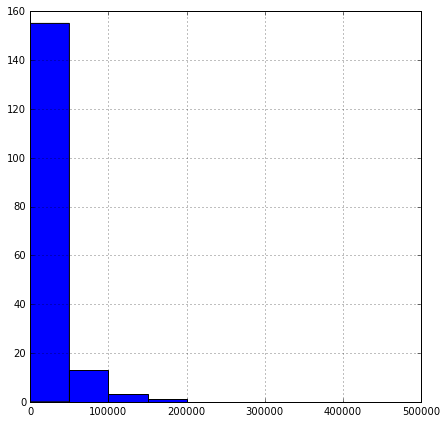

In [36]:
recent_grads['Men'].hist(bins = 10, range=(0,500000),figsize = (7,7))

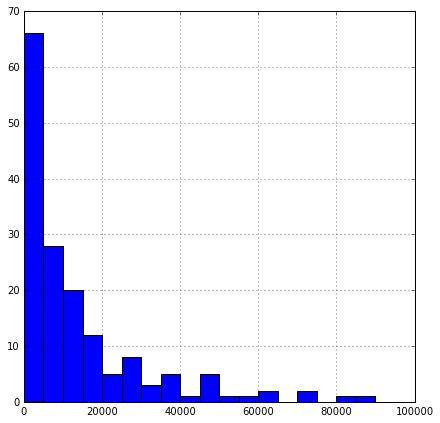

In [38]:
recent_grads['Women'].hist(bins = 20, range=(0,100000),figsize = (7,7))

We'll now use scatter matrices to see potential relationships and distributions between two columns simultaneously. First, we'll use the 'Sample_size' and 'Median' columns. Then we'll plot a scatter matrix for the 'Sample_size', 'Median' and 'Unemployment_rate' columns together.

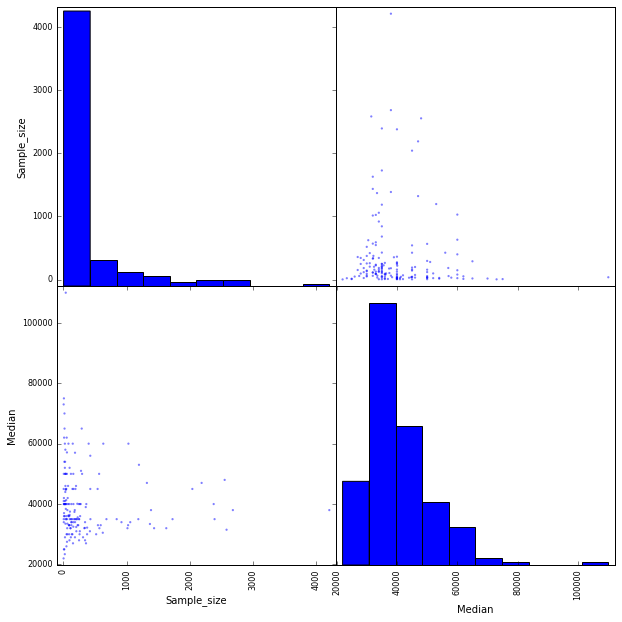

In [39]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10));

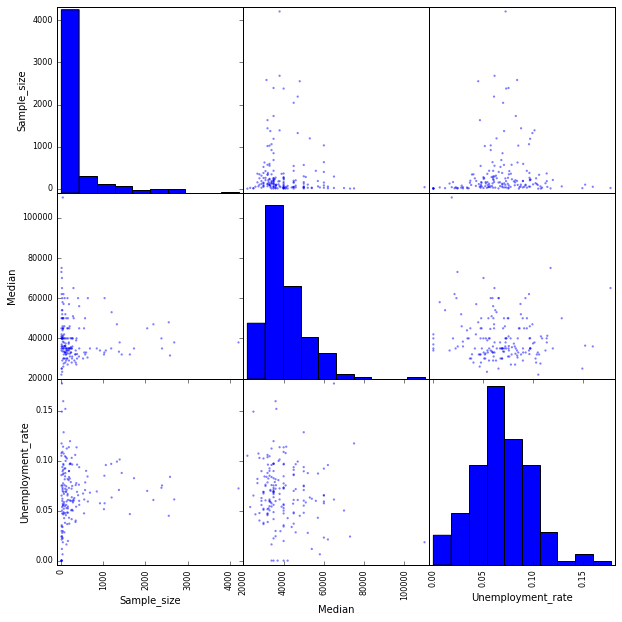

In [41]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10));

From the above histograms and scatter plots we can see that there's no correlations between those columns.

We'll continue to look at the share of women in each of the major int he top ten highest and lowest median earnings. Remember that the dataset is ordered by median earnings.

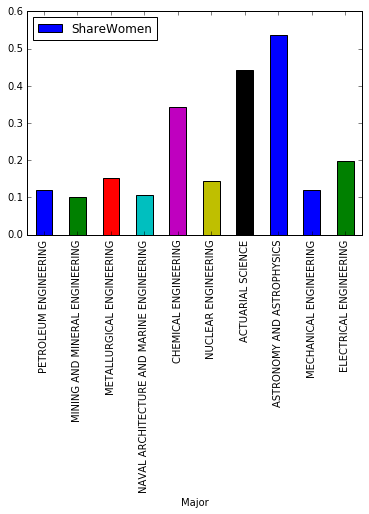

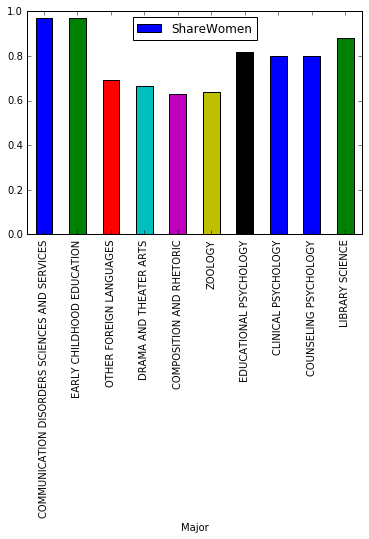

In [44]:
recent_grads[:10].plot.bar(x ='Major', y ='ShareWomen')
recent_grads[-10:].plot.bar(x ='Major', y = 'ShareWomen')

We can see that among the highest median salaries, the Astronomy and Astrophysics major has the biggest share of women, followed by the Actuarial Sciences major. For the lowest salaries all the majors have a big share of women, which supports the 'Share of Women Vs Median' plot that was shown above.

Once again we'll work with bar plots to see the unemployment rate in the top ten highest and lowest median salaries . 

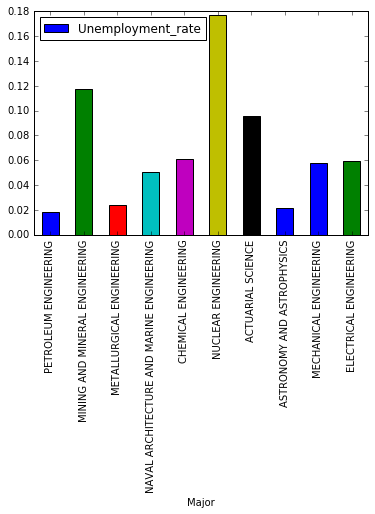

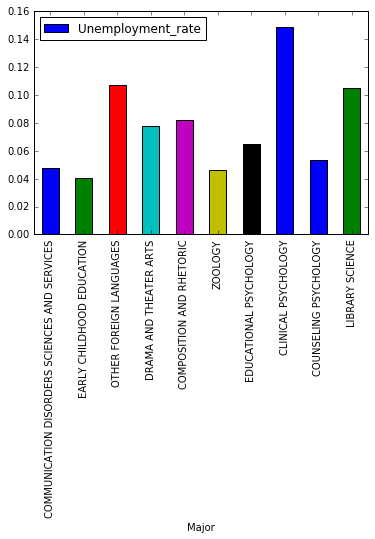

In [45]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate')

We can see that among the highest median salaries, the Nuclear Engineering major has the biggest unemployment rate, followed by the Mining and Mineral Engineering major. For the lowest salaries, the Clinical Psychology major has the biggest unemployment rate. Both high and low salary majors have high and low unemployment rates.

As we approach to end of this project, We'll use box plots to see the variation in the 'Unemployment_rate' and in the 'Median' columns.

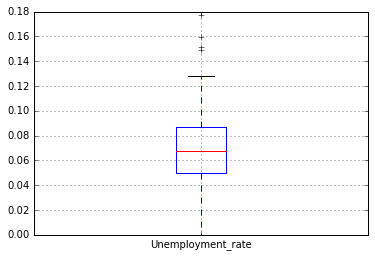

In [46]:
recent_grads[['Unemployment_rate']].boxplot()

The median is about 0.07 and the last quartile goes from about 0.085 to 0.125, while the first quartile goes from 0.05 to 0.05.

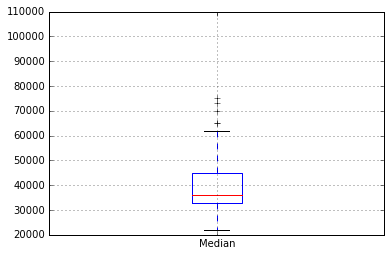

In [47]:
recent_grads[['Median']].boxplot()

The median is for the 'Median' column box plot is right below 40,000, while the last quertile goes from about 45 to 60 thousand.

## Conclusions

Based on our analysis and visualization, we are able to conclude the following points:

* There's no correlation between the total of graduates in the major and       median salary of the graduates.
* There's a small negative correlation between the share of women and the       median salary.
* There's no link between the number of full-time employees and median         salary.
* Business is the major category with more graduates.
* There more categories of majors with the majority of women than with the     majority of men.